In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RepliSage.network_analysis import *

In [2]:
Ms = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Ms.npy')
Ns = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Ns.npy')

In [3]:
Ms.shape

(1100, 500)

In [4]:
Ls = Ns-Ms

In [5]:
avg_Ls = np.average(Ls,axis=0)
std_Ls = np.std(Ls,axis=0)
sem_Ls = std_Ls / np.sqrt(Ls.shape[0])  # SEM = std / sqrt(N)
ci95 = 1.96 * sem_Ls

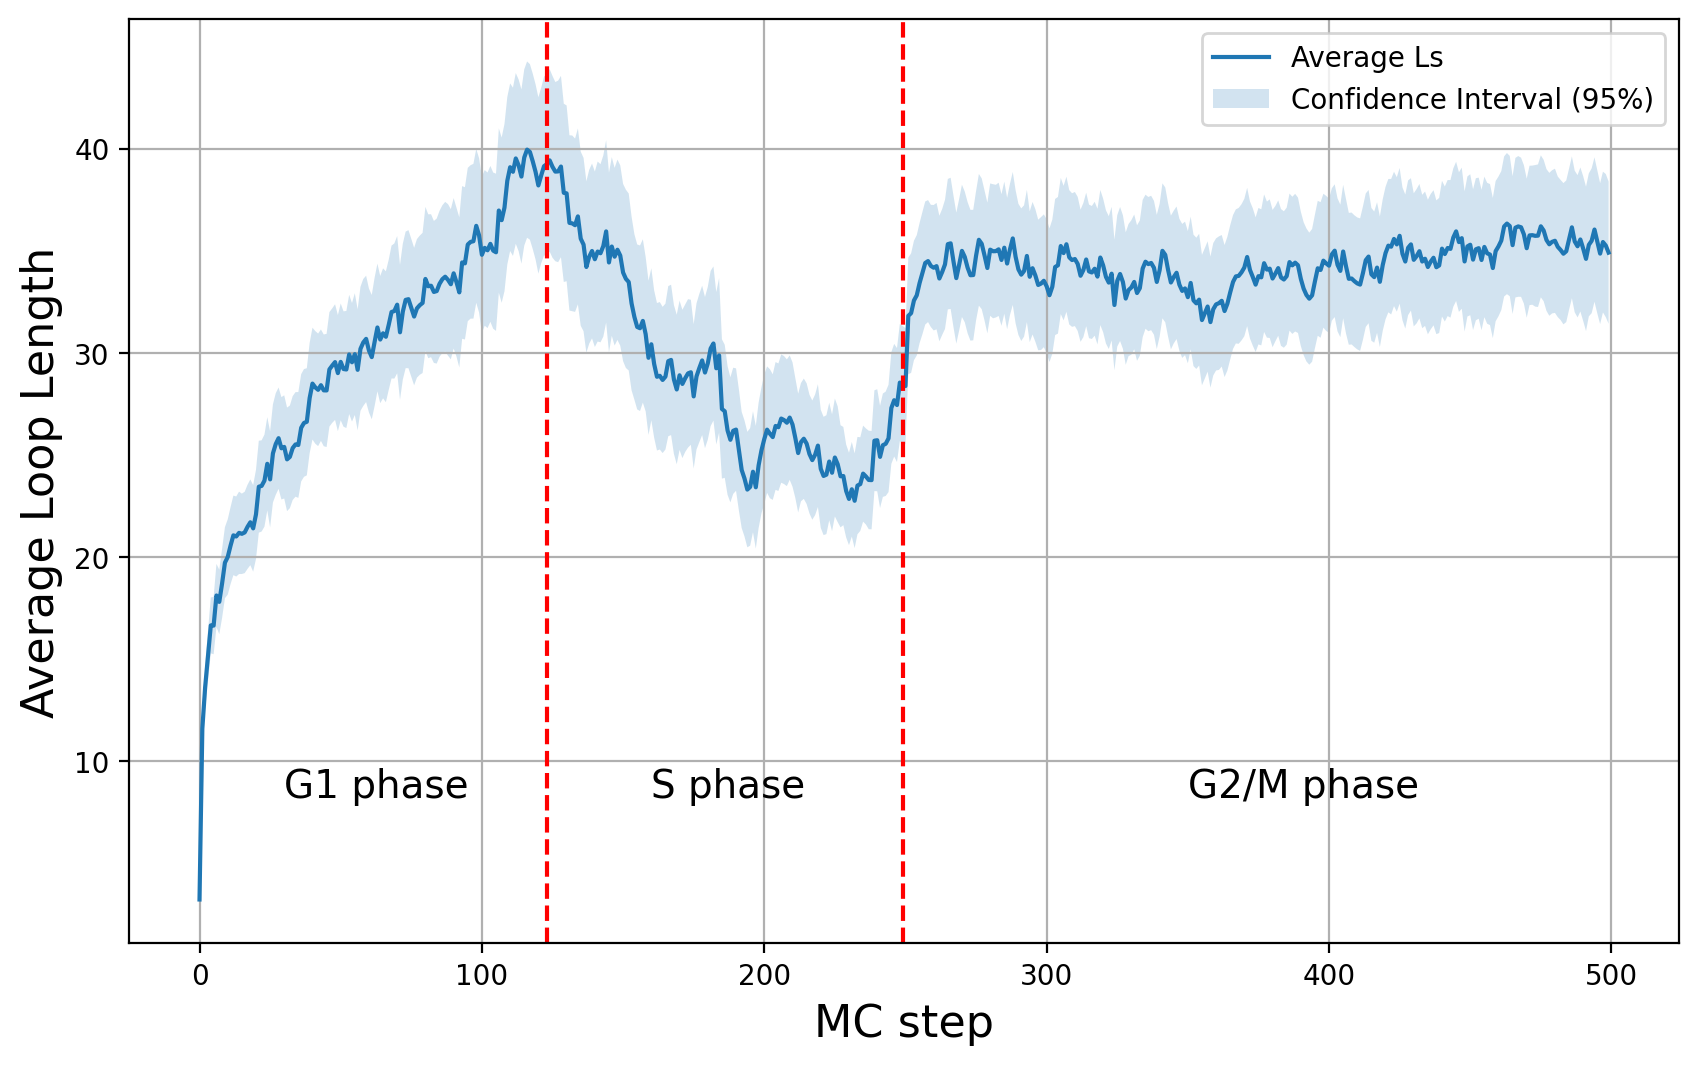

In [6]:
# Plot
plt.figure(figsize=(10, 6),dpi=200)
x = np.arange(len(avg_Ls))
plt.plot(x, avg_Ls, label='Average Ls')
plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Average Loop Length',fontsize=16)
plt.legend()
# Vertical line at x = 123
plt.axvline(x=123, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(60, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(30, np.min(avg_Ls) + 5),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(160, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(160, np.min(avg_Ls) + 5),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(350, np.min(avg_Ls)),  # Position of the annotation (centered)
             xytext=(350, np.min(avg_Ls) + 5),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [7]:
Cs = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/spin_traj.npy')

In [8]:
def compute_state_proportions(Ms, Ns, Cs):
    """
    Computes the proportion of links where connected nodes are:
    - in the same state
    - in different states
    as a function of time.

    Args:
        Ms: (array) Source node indices [i, t]
        Ns: (array) Target node indices [i, t]
        Cs: (array) Node states [n, t]
    
    Returns:
        same_state_fraction: array of proportion of same-state links at each time
        diff_state_fraction: array of proportion of different-state links at each time
    """
    num_times = Ms.shape[1]
    same_state_fraction = np.zeros(num_times)
    diff_state_fraction = np.zeros(num_times)

    for t in range(num_times):
        m_nodes = Ms[:, t]
        n_nodes = Ns[:, t]
        
        # Mask valid connections (both indices non-negative)
        valid = (m_nodes >= 0) & (n_nodes >= 0)

        if np.sum(valid) == 0:
            continue  # avoid division by zero
        
        m_states = Cs[m_nodes[valid], t]
        n_states = Cs[n_nodes[valid], t]
        
        same_state = m_states == n_states
        diff_state = m_states != n_states
        
        same_state_fraction[t] = np.sum(same_state) / np.sum(valid)
        diff_state_fraction[t] = np.sum(diff_state) / np.sum(valid)

    return same_state_fraction, diff_state_fraction

def compute_state_proportions_sign_based(Ms, Ns, Cs):
    """
    Computes the proportion of links where connected nodes are:
    - in the same sign state (both positive or both negative)
    - in different sign states
    as a function of time.

    Args:
        Ms: (array) Source node indices [i, t]
        Ns: (array) Target node indices [i, t]
        Cs: (array) Node states [n, t]
    
    Returns:
        same_sign_fraction: array of proportion of same-sign links at each time
        diff_sign_fraction: array of proportion of different-sign links at each time
    """
    num_times = Ms.shape[1]
    same_sign_fraction = np.zeros(num_times)
    diff_sign_fraction = np.zeros(num_times)

    for t in range(num_times):
        m_nodes = Ms[:, t]
        n_nodes = Ns[:, t]
        
        valid = (m_nodes >= 0) & (n_nodes >= 0)

        if np.sum(valid) == 0:
            continue
        
        m_states = Cs[m_nodes[valid], t]
        n_states = Cs[n_nodes[valid], t]
        
        # Check if one is positive and the other negative
        different_sign = (m_states > 0) & (n_states < 0) | (m_states < 0) & (n_states > 0)
        
        same_sign = ~different_sign  # complement
        
        same_sign_fraction[t] = np.sum(same_sign) / np.sum(valid)
        diff_sign_fraction[t] = np.sum(different_sign) / np.sum(valid)

    return same_sign_fraction, diff_sign_fraction

In [9]:
same_state_frac, diff_state_frac = compute_state_proportions_sign_based(Ms, Ns, Cs)

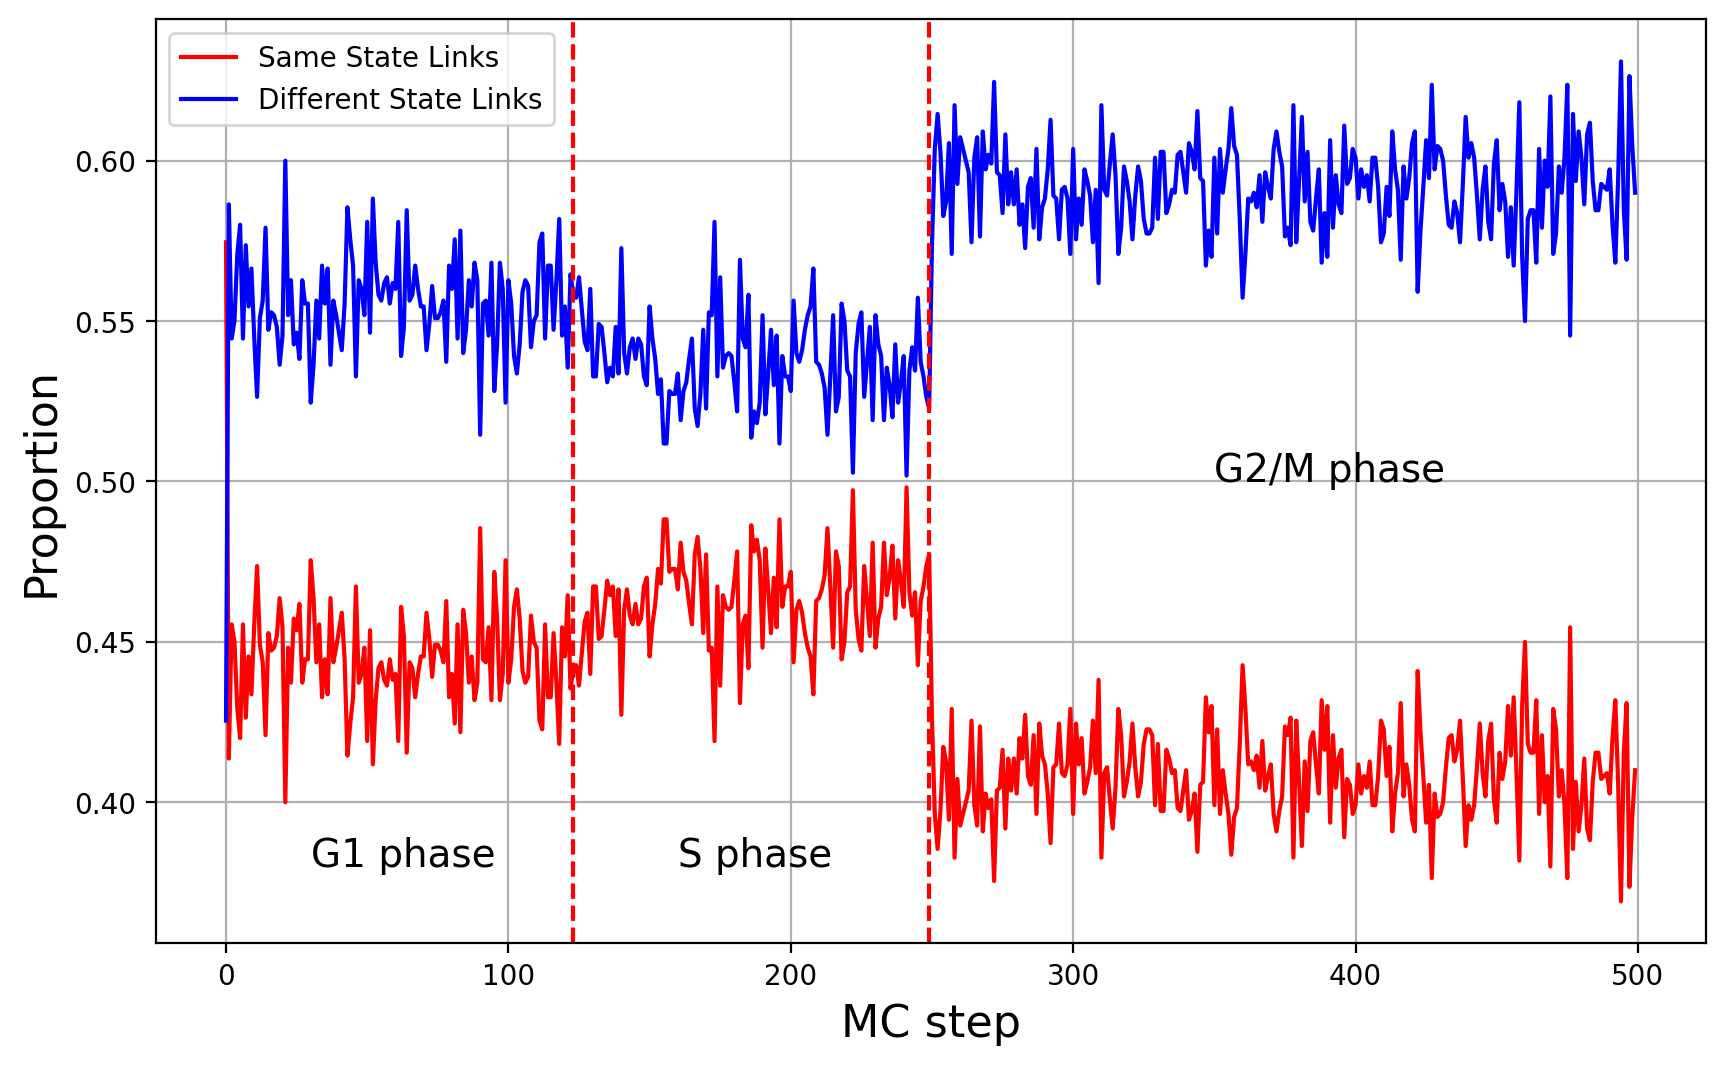

In [10]:
plt.figure(figsize=(10, 6),dpi=200)
times = np.arange(len(same_state_frac))

plt.plot(times, same_state_frac, label='Same State Links',color='red')
plt.plot(times, diff_state_frac, label='Different State Links',color='blue')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Proportion',fontsize=16)
plt.legend()

# Vertical line at x = 123
plt.axvline(x=123, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(60, 0.38),  # Position of the annotation (centered)
             xytext=(30, 0.38),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(160, 0.38),  # Position of the annotation (centered)
             xytext=(160, 0.38),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(350, 0.42),  # Position of the annotation (centered)
             xytext=(350, 0.5),  # Text position
             fontsize=14)

# plt.ylim((0,1))
# plt.title('Proportion of Same-State and Different-State Links Over Time')

plt.grid(True)
plt.show()

In [11]:
Rgs = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht0/other/Rgs.npy')

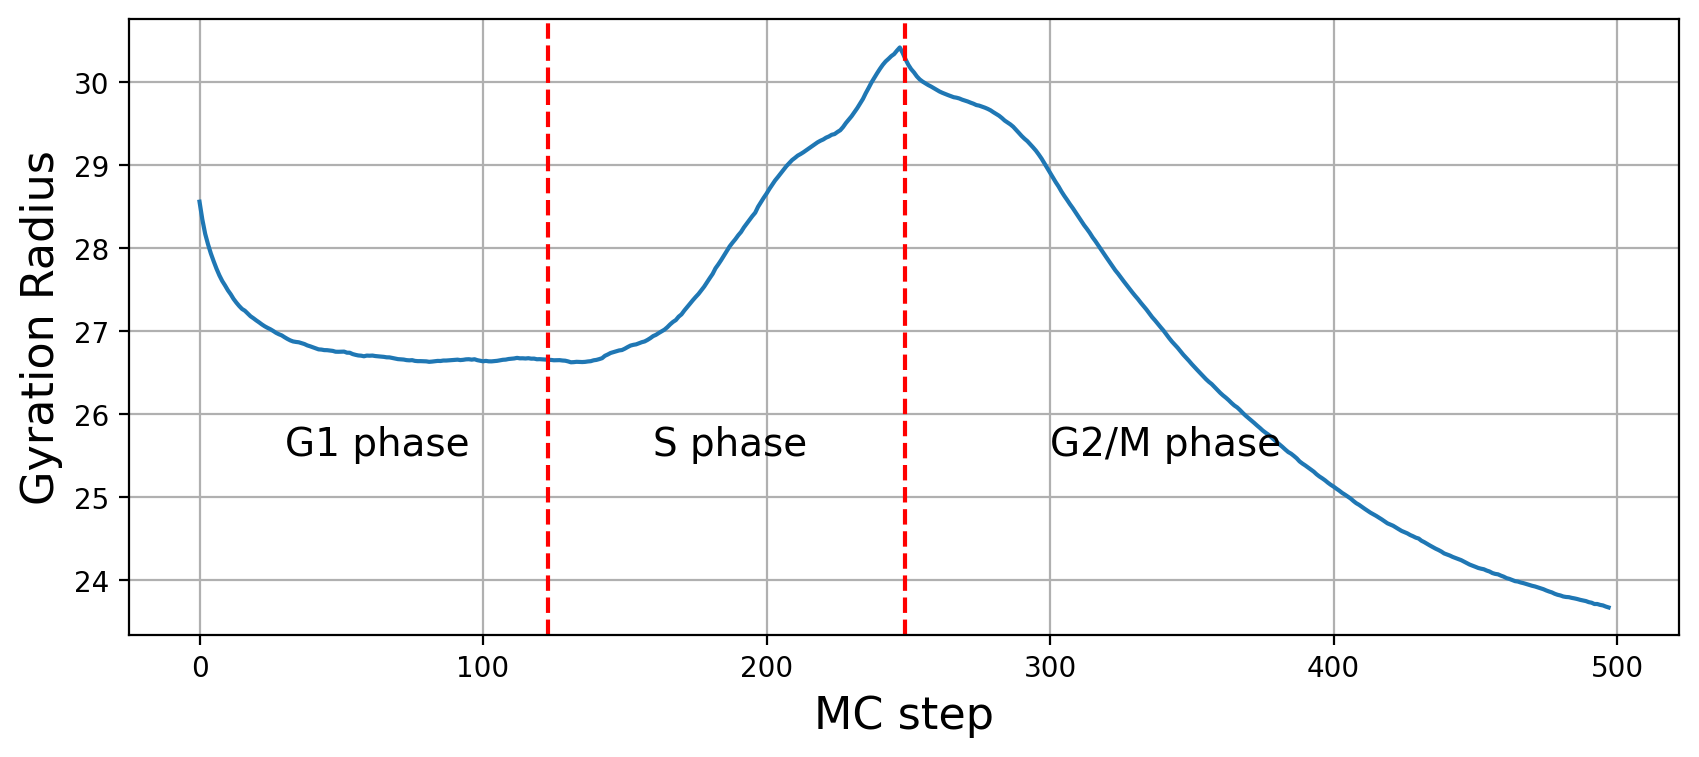

In [12]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, Rgs, label='Average Ls')
# plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Gyration Radius',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=123, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(60, 25.5),  # Position of the annotation (centered)
             xytext=(30, 25.5),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(160, 25.5),  # Position of the annotation (centered)
             xytext=(160, 25.5),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(300, 25.5),  # Position of the annotation (centered)
             xytext=(300, 25.5),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [13]:
eeds = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/eeds.npy')

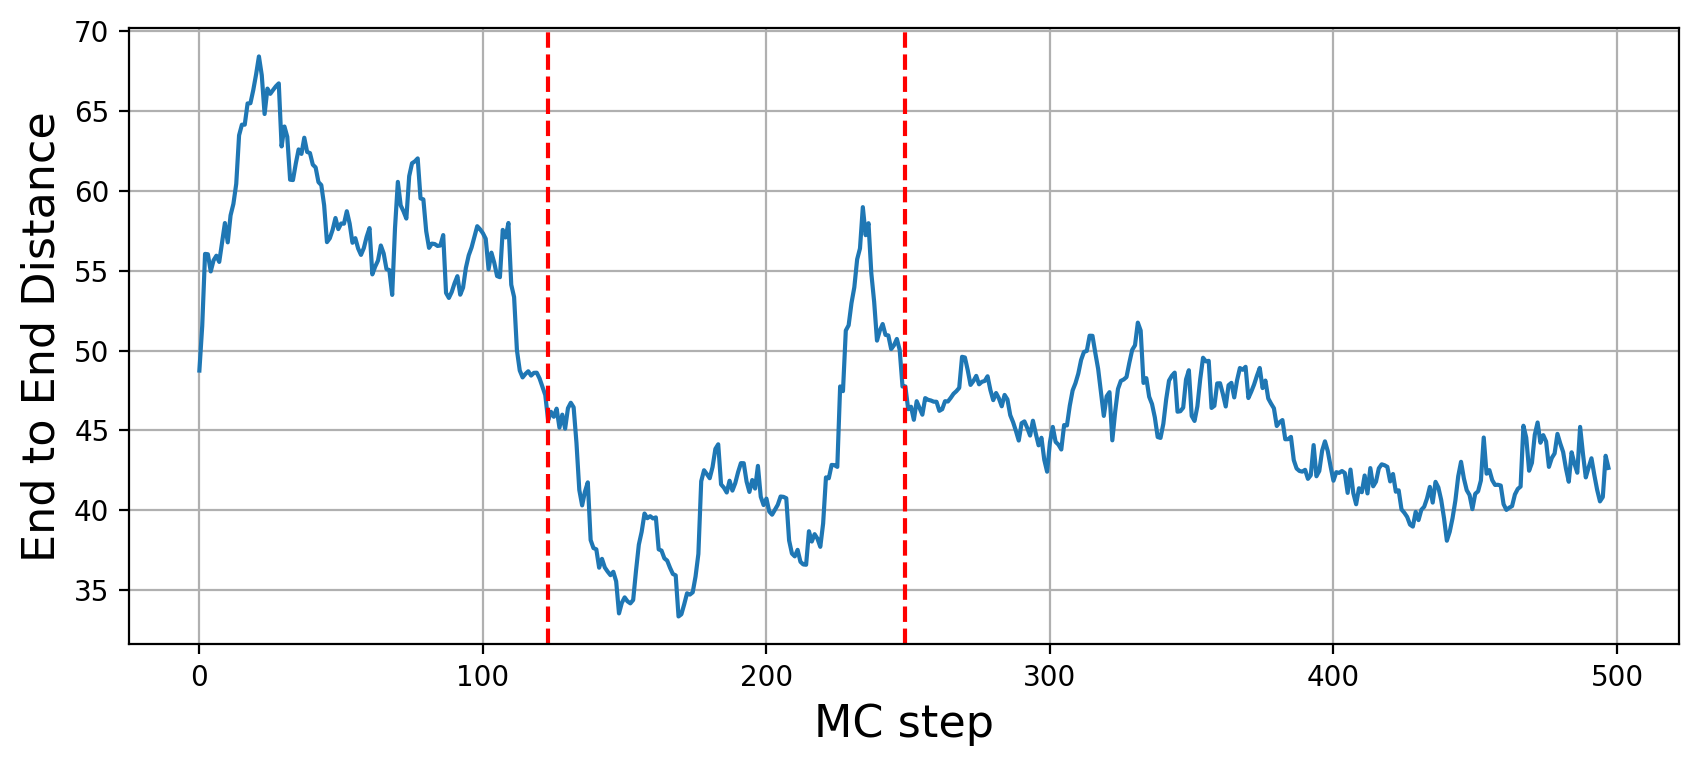

In [14]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, eeds, label='Average Ls')
# plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('End to End Distance',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=123, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(60, 25.5),  # Position of the annotation (centered)
             xytext=(30, 25.5),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(160, 25.5),  # Position of the annotation (centered)
             xytext=(160, 25.5),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(300, 25.5),  # Position of the annotation (centered)
             xytext=(300, 25.5),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [15]:
cov_vols = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/convex_hull_volume.npy')

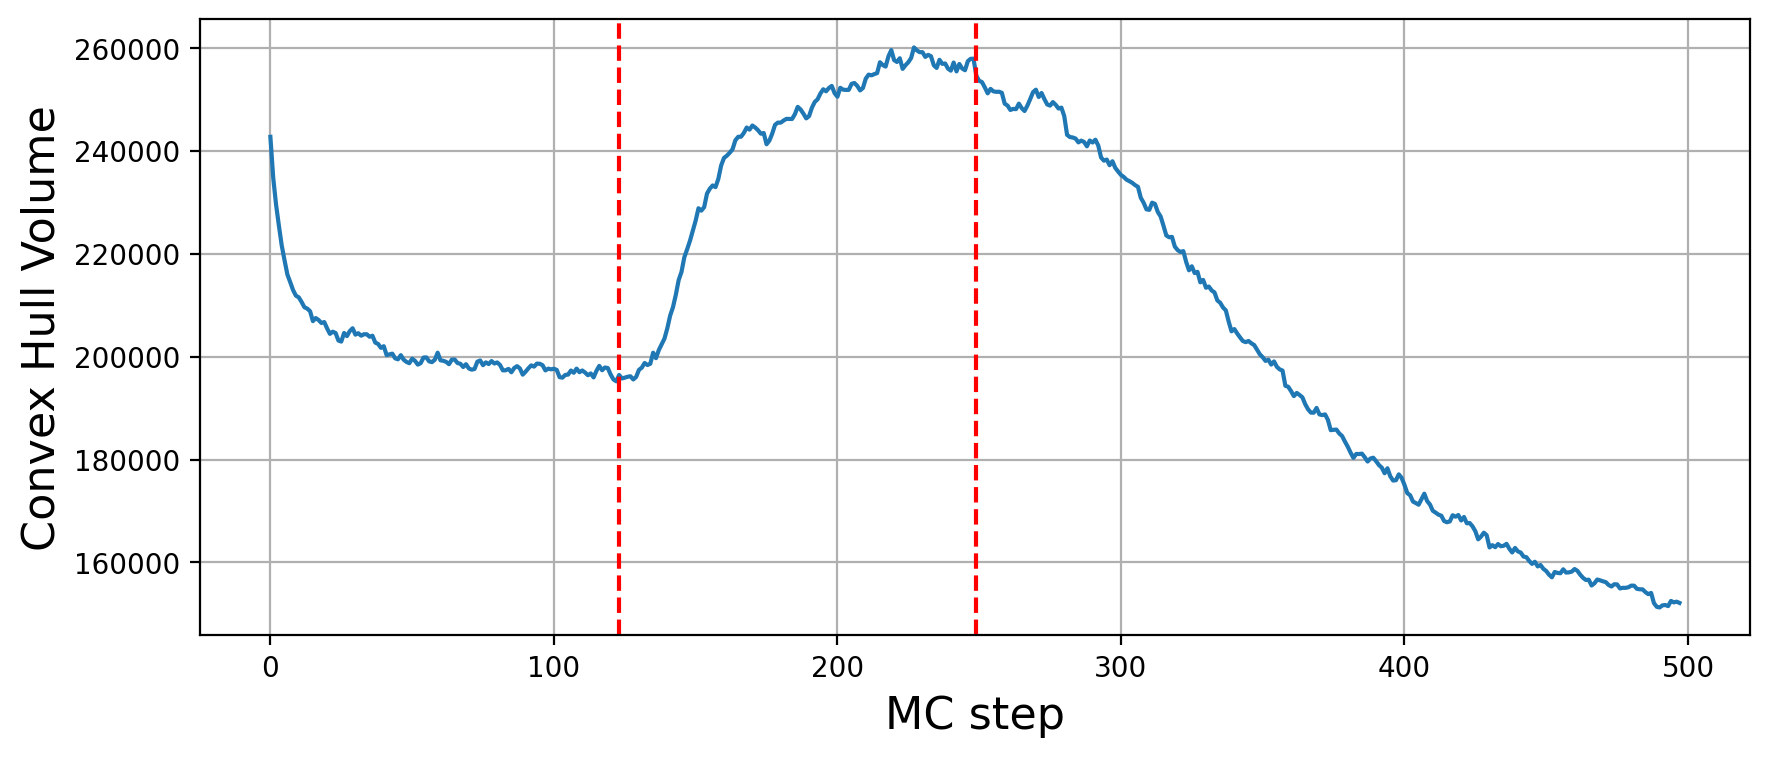

In [16]:
plt.figure(figsize=(10, 4),dpi=200)
x = np.arange(len(Rgs))
plt.plot(x, cov_vols, label='Average Ls')
# plt.fill_between(x, avg_Ls - ci95, avg_Ls + ci95, alpha=0.2, label='Confidence Interval (95%)')
plt.xlabel('MC step',fontsize=16)
plt.ylabel('Convex Hull Volume',fontsize=16)
# plt.legend()
# Vertical line at x = 123
plt.axvline(x=123, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('G1 phase', 
             xy=(60, 25.5),  # Position of the annotation (centered)
             xytext=(30, 25.5),  # Text position
             fontsize=14)

# Vertical line at x = 123
plt.axvline(x=249, color='red', linestyle='--', label='x = 123')

# Annotate G1 phase
plt.annotate('S phase', 
             xy=(160, 25.5),  # Position of the annotation (centered)
             xytext=(160, 25.5),  # Text position
             fontsize=14)

# Annotate G1 phase
plt.annotate('G2/M phase', 
             xy=(300, 25.5),  # Position of the annotation (centered)
             xytext=(300, 25.5),  # Text position
             fontsize=14)

# plt.title('Average Ls with 95% Confidence Interval',fontsize=16)

plt.grid(True)
plt.show()

In [17]:
Es = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Es.npy')
Fs = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Fs.npy')
Bs = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Bs.npy')
Rs = np.load('/home/blackpianocat/Downloads/RepliSage_chromosome_14_ht/other/Rs.npy')

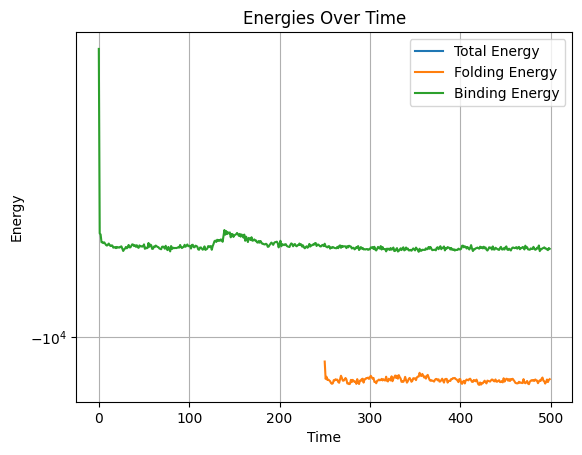

In [18]:
plt.plot(times, Es, label='Total Energy')
plt.plot(times, Fs, label='Folding Energy')
plt.plot(times, Bs, label='Binding Energy')
# plt.plot(times, Rs, label='Replication Energy')

plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energies Over Time')
plt.legend()
plt.yscale('symlog')
plt.grid(True)
plt.show()

In [20]:
Fs

array([            inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,  